# CHAPTER 8: An Introduction to Artificial Intelligence

# Solutions to Exercises

${\bf 1.}$ Given the activation functions:

$$\sigma(v)=\frac{1}{1+e^{-v}},$$

$$\phi(v)=\tanh(v)=\frac{e^v-e^{-v}}{e^v+e^{-v}},$$

show that:

(a) $\frac{d\sigma}{dv}=\sigma(v)(1-\sigma(v));$

(b) $\frac{d\phi}{dv}=1-(\phi(v))^2.$

Plot the curves and their derivatives.

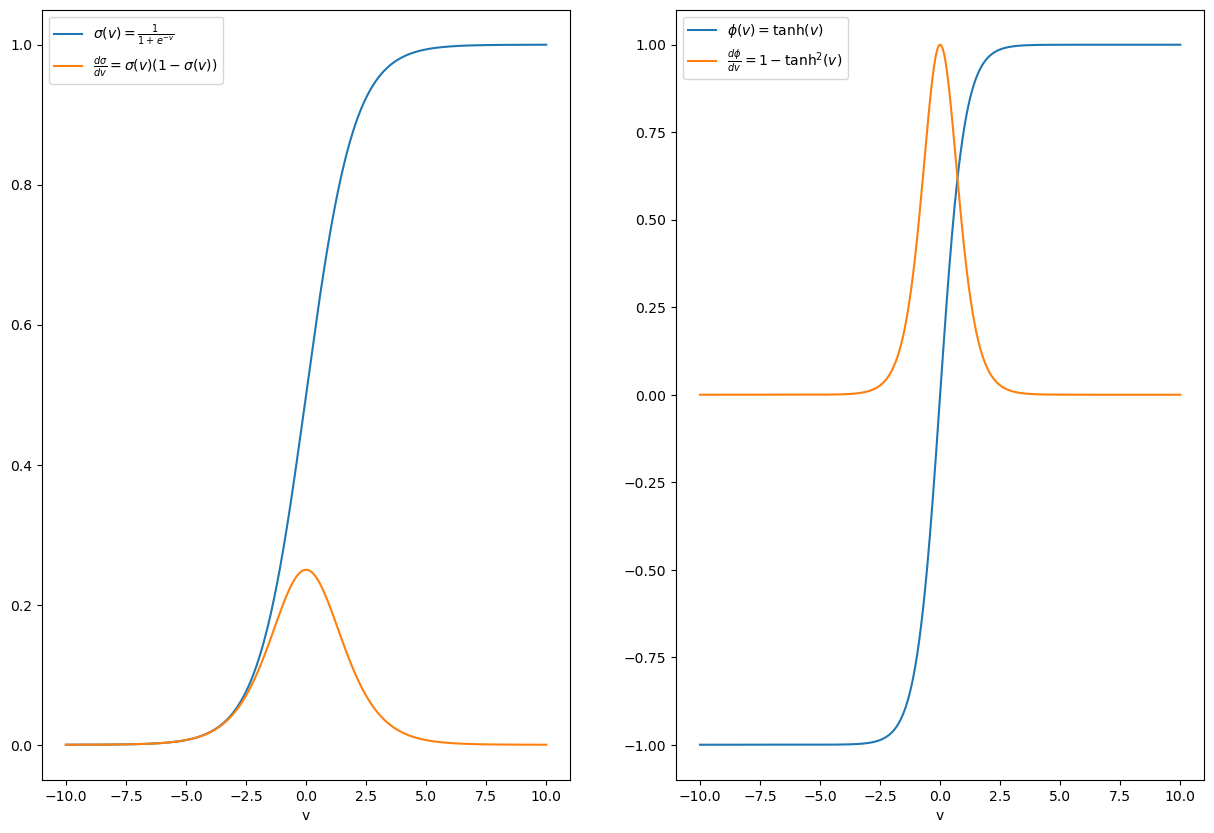

In [5]:
# 1: Activation functions and their derivatives.
import numpy as np
import matplotlib.pyplot as plt
x = np.linspace(-10, 10, 1000)
y = np.maximum(0, x)
plt.figure(figsize=(15, 10))
plt.subplot(1, 2, 1)
y = 1 / (1 + np.exp(-x) )
plt.plot(x, y,label = r"$\sigma(v)=\frac{1}{1+e^{-v}}$")
plt.plot(x, y * (1 - y), label = r"$\frac{d \sigma}{dv} = \sigma(v) (1 - \sigma(v))$" )
plt.xlabel("v")
plt.legend()

plt.subplot(1, 2, 2)
y = ( 2 / (1 + np.exp(-2*x) ) ) -1
plt.plot(x,y,label = r"$\phi(v)=\tanh(v)$")
plt.plot(x, 1 - y**2, label = r"$\frac{d \phi}{dv}=1 - \tanh^2(v)$")
plt.xlabel("v")
plt.legend()
plt.show()

${\bf 2.}$ Show that the XOR Gate ANN shown above acts as a good approximation of an XOR gate, given that: 

$$w_{11}=60, w_{12}=80, w_{21} =60, w_{22} =80, w_{13} =−60, w_{23}=60,$$

$$b_1 = −90, b_2 = −40, b_3=-30.$$

Use the sigmoid transfer function in your program.

In [6]:
# 2: ANN for an XOR Logic Gate.
import numpy as np
w11 , w12 , w21 , w22 , w13 , w23 = 60 , 80 , 60 , 80 , -60 , 60
b1 , b2 , b3 = -90 , -40 , -30
def sigmoid(x):
  return 1 / (1 + np.exp(-x))

def XOR(x1 , x2):
  h1 = x1 * w11 + x2 * w21 + b1
  h2 = x1 * w12 + x2 * w22 + b2 
  o1 = sigmoid(h1) * w13 + sigmoid(h2) * w23 + b3
  return sigmoid(o1)
print("XOR(0,0)= " , XOR(0 ,0))
print("XOR(0,1)= " , XOR(0 ,1))
print("XOR(1,0)= " , XOR(1 ,0))
print("XOR(1,1)= " , XOR(1 ,1))

XOR(0,0)=  9.357622968839299e-14
XOR(0,1)=  0.9999999999999065
XOR(1,0)=  0.9999999999999065
XOR(1,1)=  9.357622968891759e-14


${\bf 3.}$ Use backpropagation to update the weights $w_{11}, w_{12}, w_{21}$ and $w_{22}$ for the XOR Gate ANN in Example 8.2.1.

In [7]:
# 3: Backpropagation, keep the biases constant in this case.
import numpy as np
w11,w12,w21,w22,w13,w23 = 0.2,0.15,0.25,0.3,0.15,0.1
b1 , b2 , b3 = -1 , -1 , -1
yt , eta = 0 , 0.1
x1 , x2 = 1 , 1
def sigmoid(v):
    return 1 / (1 + np.exp(- v))
h1 = x1 * w11 + x2 * w21 + b1
h2 = x1 * w12 + x2 * w22 + b2
o1 = sigmoid(h1) * w13 + sigmoid(h2) * w23 + b3
y = sigmoid(o1)
print("y = ", y)
# Backpropagate.
dErrdw13=(yt-y)*sigmoid(o1)*(1-sigmoid(o1))*sigmoid(h1)
w13 = w13 - eta * dErrdw13
print("w13_new = ", w13)
dErrdw23=(yt-y)*sigmoid(o1)*(1-sigmoid(o1))*sigmoid(h2)
w23 = w23 - eta * dErrdw23
print("w23_new = ", w23)
dErrdw11=(yt-y)*sigmoid(o1)*(1-sigmoid(o1))*w13*sigmoid(h1)*(1-sigmoid(h1))*x1
w11 = w11 - eta * dErrdw11
print("w11_new = ", w11)
dErrdw12=(yt-y)*sigmoid(o1)*(1-sigmoid(o1))*w23*sigmoid(h2)*(1-sigmoid(h2))*x1
w12 = w12 - eta * dErrdw12
print("w12_new = ", w12)
dErrdw21=(yt-y)*sigmoid(o1)*(1-sigmoid(o1))*w13*sigmoid(h1)*(1-sigmoid(h1))*x2
w21 = w21 - eta * dErrdw21
print("w21_new = ", w21)
dErrdw22=(yt-y)*sigmoid(o1)*(1-sigmoid(o1))*w23*sigmoid(h1)*(1-sigmoid(h1))*x2
w22 = w22 - eta * dErrdw22
print("w22_new = ", w22)

y =  0.28729994077761756
w13_new =  0.1521522763401024
w23_new =  0.10215227634010242
w11_new =  0.20020766275648338
w12_new =  0.15013942100503588
w21_new =  0.2502076627564834
w22_new =  0.3001394210050359


${\bf 4.}$ Run the ANN program listed in Chapter 12 to value the houses in Boston's suburbs. Three attributes are used in the program (average number of rooms, index of accessible radial highways, percentage lower status of population). The target data is median value of owner-occupied homes. List 10 attributes which would be important to you when purchasing your house.

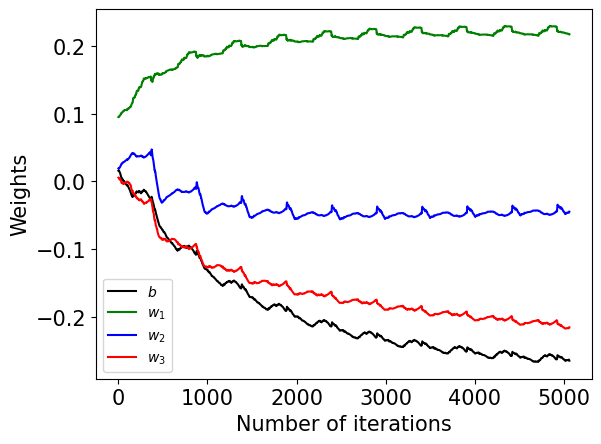

In [12]:
# 4: Backpropagation of errors - using the perceptron.
# Training Boston housing data (housing.txt). 
# The target is the value of a house (column 13).
# In this case, use 3 attributes (columns 5, 8, and 12).

import matplotlib.pyplot as plt
import numpy as np

data = np.loadtxt('housing.txt')
rows, columns = data.shape
columns = 4  # Using 4 columns from the data in this case.

X = data[:, [5, 8, 12]]             # The three data coumns.
t = data[:, 13]                     # The target data.
ws1, ws2, ws3, ws4 = [], [], [], [] # Empty lists of weights.
k = 0

xmean = X.mean(axis=0)              # Normalize the data.
xstd = X.std(axis=0)
ones = np.array([np.ones(rows)])
X = (X - xmean * ones.T) / (xstd * ones.T)
X = np.c_[np.ones(rows), X]
tmean = (max(t) + min(t)) / 2
tstd = (max(t) - min(t)) / 2
t = (t - tmean) / tstd

w = 0.1 * np.random.random(columns)  # Set random weights.
y1 = np.tanh(X.dot(w))
e1 = t - y1
mse = np.var(e1)

num_epochs = 10  # Number of iterations is 506*num_epochs.
eta = 0.001      # The learning rate.
k = 1

# Backpropagation.
for m in range(num_epochs):
    for n in range(rows):
        yk = np.tanh(X[n, :].dot(w))
        err = yk - t[n]
        g = X[n, :].T * ((1 - yk**2) * err)
        w = w - eta*g
        k += 1
        ws1.append([k, np.array(w[0]).tolist()])
        ws2.append([k, np.array(w[1]).tolist()])
        ws3.append([k, np.array(w[2]).tolist()])
        ws4.append([k, np.array(w[3]).tolist()])

ws1 = np.array(ws1)
ws2 = np.array(ws2)
ws3 = np.array(ws3)
ws4 = np.array(ws4)

plt.plot(ws1[:, 0], ws1[:, 1], 'k', markersize=0.1,label = r"$b$")
plt.plot(ws2[:, 0], ws2[:, 1], 'g', markersize=0.1,label = r"$w_1$")
plt.plot(ws3[:, 0], ws3[:, 1], 'b', markersize=0.1,label = r"$w_2$")
plt.plot(ws4[:, 0], ws4[:, 1], 'r', markersize=0.1,label = r"$w_3$")
plt.xlabel('Number of iterations', fontsize=15)
plt.ylabel('Weights', fontsize=15)
plt.tick_params(labelsize=15)
plt.legend()
plt.show()

Once the weights have converged, the ANN can be used to value other homes. REMINDER: The data is from the 1970s.

Change the learning rate and number of epochs to see how the convergence is affected.

# End Solutions to Exercises

<span>&copy; Stephen Lynch 2023-present.</span>